In [1]:
import numpy as np
import pandas as pd
import json
import ijson
import matplotlib.pyplot as plt
import seaborn as sns
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Apertura y lectura del fichero
with open('yelp_business.json', 'rb') as f:
    data = f.readlines()
    
# Eliminamos los saltos de línea '\n'   
data = map(lambda x: x.rstrip(), data)

# Visualizamos
data

['{"business_id":"0DI8Dt2PJp07XkVvIElIcQ","name":"Innovative Vapors","neighborhood":"","address":"227 E Baseline Rd, Ste J2","city":"Tempe","state":"AZ","postal_code":"85283","latitude":33.3782141,"longitude":-111.936102,"stars":4.5,"review_count":17,"is_open":0,"attributes":["BikeParking: True","BusinessAcceptsBitcoin: False","BusinessAcceptsCreditCards: True","BusinessParking: {\'garage\': False, \'street\': False, \'validated\': False, \'lot\': True, \'valet\': False}","DogsAllowed: False","RestaurantsPriceRange2: 2","WheelchairAccessible: True"],"categories":["Tobacco Shops","Nightlife","Vape Shops","Shopping"],"hours":["Monday 11:0-21:0","Tuesday 11:0-21:0","Wednesday 11:0-21:0","Thursday 11:0-21:0","Friday 11:0-22:0","Saturday 10:0-22:0","Sunday 11:0-18:0"],"type":"business"}',
 '{"business_id":"LTlCaCGZE14GuaUXUGbamg","name":"Cut and Taste","neighborhood":"","address":"495 S Grand Central Pkwy","city":"Las Vegas","state":"NV","postal_code":"89106","latitude":36.1922841,"longitud

In [3]:
type(data)

list

In [4]:
type(data[0])
# El primer elemento de la lista, el objeto json, es un string

str

In [5]:
data[349]
# Éste es un objeto 'problemático' debido a los valores null. En intentos anteriores, al cargarlo como Dataframe en pandas
# allí donde hay un valor null en la casilla del Dataframe se visualiza 'None' pero realmente no existe el dato al tratar de 
# consultarlo. Al solicitar su type devuelve NoneType y no se puede iterar sobre éstos valores

'{"business_id":"_pB9835LgzF1fSXciADWzQ","name":"Autentica Foods Empanadas","neighborhood":"","address":"9 Milvan Drive","city":"North York","state":"ON","postal_code":"M9L 1Y9","latitude":43.7511797,"longitude":-79.552238,"stars":2.5,"review_count":3,"is_open":1,"attributes":null,"categories":null,"hours":null,"type":"business"}'

In [6]:
data[349].replace('null', '"None"')
# Dado que, aún es un string, usaremos el atributo replace para cambiar la cadena de caracteres 'null' por '"None"'

'{"business_id":"_pB9835LgzF1fSXciADWzQ","name":"Autentica Foods Empanadas","neighborhood":"","address":"9 Milvan Drive","city":"North York","state":"ON","postal_code":"M9L 1Y9","latitude":43.7511797,"longitude":-79.552238,"stars":2.5,"review_count":3,"is_open":1,"attributes":"None","categories":"None","hours":"None","type":"business"}'

In [7]:
data[349]
# Si no guardamos el dato anterior en una variable vemos que el cambio no aplica

'{"business_id":"_pB9835LgzF1fSXciADWzQ","name":"Autentica Foods Empanadas","neighborhood":"","address":"9 Milvan Drive","city":"North York","state":"ON","postal_code":"M9L 1Y9","latitude":43.7511797,"longitude":-79.552238,"stars":2.5,"review_count":3,"is_open":1,"attributes":null,"categories":null,"hours":null,"type":"business"}'

In [8]:
data_dict = []

# Para cada objeto json o string (business info) reemplazo lo anteriormente expuesto además de otros valores que, en lugar
# de valor null incluyen un espacio en blanco y utilizo la funcion json.loads para cargarlo ahora sí como un diccionario 
# de Python y los voy incorporando a la lista data_dict

for i in range(len(data)):
    x = data[i]
    x1 = x.replace('null', '"None"')
    x2 = x1.replace('""', '"None"')
    y = json.loads(x2)
    data_dict.append(y)

In [9]:
# Visualizamos el resultado del loop
data_dict[0]

{u'address': u'227 E Baseline Rd, Ste J2',
 u'attributes': [u'BikeParking: True',
  u'BusinessAcceptsBitcoin: False',
  u'BusinessAcceptsCreditCards: True',
  u"BusinessParking: {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
  u'DogsAllowed: False',
  u'RestaurantsPriceRange2: 2',
  u'WheelchairAccessible: True'],
 u'business_id': u'0DI8Dt2PJp07XkVvIElIcQ',
 u'categories': [u'Tobacco Shops', u'Nightlife', u'Vape Shops', u'Shopping'],
 u'city': u'Tempe',
 u'hours': [u'Monday 11:0-21:0',
  u'Tuesday 11:0-21:0',
  u'Wednesday 11:0-21:0',
  u'Thursday 11:0-21:0',
  u'Friday 11:0-22:0',
  u'Saturday 10:0-22:0',
  u'Sunday 11:0-18:0'],
 u'is_open': 0,
 u'latitude': 33.3782141,
 u'longitude': -111.936102,
 u'name': u'Innovative Vapors',
 u'neighborhood': u'None',
 u'postal_code': u'85283',
 u'review_count': 17,
 u'stars': 4.5,
 u'state': u'AZ',
 u'type': u'business'}

In [10]:
# Convertimos la lista de diccionarios en Dataframe
business = pd.DataFrame.from_records(data_dict)

In [11]:
business.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,type
0,"227 E Baseline Rd, Ste J2","[BikeParking: True, BusinessAcceptsBitcoin: Fa...",0DI8Dt2PJp07XkVvIElIcQ,"[Tobacco Shops, Nightlife, Vape Shops, Shopping]",Tempe,"[Monday 11:0-21:0, Tuesday 11:0-21:0, Wednesda...",0,33.378214,-111.936102,Innovative Vapors,None,85283,17,4.5,AZ,business
1,495 S Grand Central Pkwy,"[BusinessAcceptsBitcoin: False, BusinessAccept...",LTlCaCGZE14GuaUXUGbamg,"[Caterers, Grocery, Food, Event Planning & Ser...",Las Vegas,"[Monday 0:0-0:0, Tuesday 0:0-0:0, Wednesday 0:...",1,36.192284,-115.159272,Cut and Taste,None,89106,9,5.0,NV,business
2,979 Bloor Street W,"[Alcohol: none, Ambience: {'romantic': False, ...",EDqCEAGXVGCH4FJXgqtjqg,"[Restaurants, Pizza, Chicken Wings, Italian]",Toronto,"[Monday 11:0-2:0, Tuesday 11:0-2:0, Wednesday ...",1,43.661054,-79.429089,Pizza Pizza,Dufferin Grove,M6H 1L5,7,2.5,ON,business


In [12]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144072 entries, 0 to 144071
Data columns (total 16 columns):
address         144072 non-null object
attributes      144072 non-null object
business_id     144072 non-null object
categories      144072 non-null object
city            144072 non-null object
hours           144072 non-null object
is_open         144072 non-null int64
latitude        144072 non-null float64
longitude       144072 non-null float64
name            144072 non-null object
neighborhood    144072 non-null object
postal_code     144072 non-null object
review_count    144072 non-null int64
stars           144072 non-null float64
state           144072 non-null object
type            144072 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 17.6+ MB


In [13]:
# NOTAS ANTIGUAS PARA TEMA DE VALORES NULOS (NO APLICAN)
# business[business['attributes'].isnull()].head()
# type(business['attributes'][74]) # NoneType
# business.loc[business['attributes'].isnull(), 'attributes'] = 'None'
# business['attributes'][74] # 'None'
# business['attributes'].isnull().sum() # 0

In [14]:
# Creo la lista attributes para obtener el total de atributos del dataset, ya que han quedado bajo formato lista en la 
# columna ['attributes']. En el bucle indico que si el valor de ['attributes'] es 'None' lo ignore y si es una lista de
# atributos la iteraremos haciendo un split de cada uno de los elementos de la lista recuperando el atributo en sí, es decir,
# aquéllo que va antes de los ':'

attributes = []

for i in range(len(business['attributes'])):
    x = business['attributes'][i]
    if x == 'None':
        pass
    else:
        for j in range(len(x)):
            y = x[j]
            w = y.split(':')
            attributes.append(w[0])

In [15]:
len(attributes), len(set(attributes))

(1134854, 39)

In [16]:
# Veamos los valores únicos de la recién creada lista de atributos
set(attributes)

{u'AcceptsInsurance',
 u'AgesAllowed',
 u'Alcohol',
 u'Ambience',
 u'BYOB',
 u'BYOBCorkage',
 u'BestNights',
 u'BikeParking',
 u'BusinessAcceptsBitcoin',
 u'BusinessAcceptsCreditCards',
 u'BusinessParking',
 u'ByAppointmentOnly',
 u'Caters',
 u'CoatCheck',
 u'Corkage',
 u'DietaryRestrictions',
 u'DogsAllowed',
 u'DriveThru',
 u'GoodForDancing',
 u'GoodForKids',
 u'GoodForMeal',
 u'HairSpecializesIn',
 u'HappyHour',
 u'HasTV',
 u'Music',
 u'NoiseLevel',
 u'Open24Hours',
 u'OutdoorSeating',
 u'RestaurantsAttire',
 u'RestaurantsCounterService',
 u'RestaurantsDelivery',
 u'RestaurantsGoodForGroups',
 u'RestaurantsPriceRange2',
 u'RestaurantsReservations',
 u'RestaurantsTableService',
 u'RestaurantsTakeOut',
 u'Smoking',
 u'WheelchairAccessible',
 u'WiFi'}

In [17]:
for i in data_dict[0]:
    if i == 'attributes':
        for at in data_dict[0]['attributes']:
            print at.partition(':')[0]
    else:
        print i

city
neighborhood
name
business_id
longitude
hours
state
postal_code
categories
stars
address
latitude
review_count
BikeParking
BusinessAcceptsBitcoin
BusinessAcceptsCreditCards
BusinessParking
DogsAllowed
RestaurantsPriceRange2
WheelchairAccessible
type
is_open


In [18]:
# Idem para las categorías

categories = []

for i in range(len(business['categories'])):
    x = business['categories'][i]
    if x == 'None':
        pass
    else:
        for j in range(len(x)):
            y = x[j]
            categories.append(y)

In [19]:
# El número de valores únicos sigue siendo muy elevado
len(categories), len(set(categories))

(527604, 1191)

In [20]:
set(categories)

{u'Masonry/Concrete',
 u'Anesthesiologists',
 u'Squash',
 u'Truck Rental',
 u'Drugstores',
 u'Pool & Hot Tub Service',
 u'Well Drilling',
 u'Afghan',
 u'Trains',
 u'Buffets',
 u'Rotisserie Chicken',
 u'Process Servers',
 u'Boating',
 u'Auto Insurance',
 u'Child Care & Day Care',
 u'Palatine',
 u'Endodontists',
 u'Creperies',
 u'Canadian (New)',
 u'Business Law',
 u'Homeowner Association',
 u'Teppanyaki',
 u'Pretzels',
 u'Occupational Therapy',
 u'Fishmonger',
 u'Organic Stores',
 u'Dry Cleaning & Laundry',
 u'Life Coach',
 u'Architects',
 u'Paint-Your-Own Pottery',
 u'Ukrainian',
 u'Contract Law',
 u'Packing Supplies',
 u'Sandblasting',
 u'Juice Bars & Smoothies',
 u'Pet Boarding/Pet Sitting',
 u'Grocery',
 u'Mortgage Lenders',
 u'Pet Adoption',
 u'Indoor Landscaping',
 u'Interval Training Gyms',
 u'Hair Removal',
 u'Dog Parks',
 u'Cannabis Tours',
 u'Private Jet Charter',
 u'Baseball Fields',
 u'Adult Education',
 u'Knife Sharpening',
 u'Roof Inspectors',
 u'Pathologists',
 u'Stadiums

In [21]:
# Visto que el número de categorías es elevado, pero el de atributos es relativamente asumible me he propuesto crear un nuevo 
# Dataframe. Para ello iteraremos sobre la lista data_dict anteriormente generada y crearemos una nueva que incluya los 
# nuevos diccionarios con la info de cada business. La diferencia será que elminaremos la key 'attributes' (que actúa más como 
# un metadato) e iteraremos sobre valores de la lista. Cada valor es en el fondo un par (key, value) por lo que usando
# .partition haremos que el primer elemento pase a formar la nueva key (y futura columna en el Dataframe)

data_dict_2 = []

for i in range(len(data_dict)):
    x = data_dict[i]
    data_dict_3 = []
    for j in x:
        if j == 'attributes':
            for at in x['attributes']:
                if x['attributes'] == 'None':
                    pass
                else:
                    data_dict_3.append((at.partition(':')[0], at.partition(':')[2]))
        else:
            data_dict_3.append((j,x[j]))
    data_dict_2.append(dict(data_dict_3))

In [22]:
data_dict_2[0]

{u'BikeParking': u' True',
 u'BusinessAcceptsBitcoin': u' False',
 u'BusinessAcceptsCreditCards': u' True',
 u'BusinessParking': u" {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
 u'DogsAllowed': u' False',
 u'RestaurantsPriceRange2': u' 2',
 u'WheelchairAccessible': u' True',
 u'address': u'227 E Baseline Rd, Ste J2',
 u'business_id': u'0DI8Dt2PJp07XkVvIElIcQ',
 u'categories': [u'Tobacco Shops', u'Nightlife', u'Vape Shops', u'Shopping'],
 u'city': u'Tempe',
 u'hours': [u'Monday 11:0-21:0',
  u'Tuesday 11:0-21:0',
  u'Wednesday 11:0-21:0',
  u'Thursday 11:0-21:0',
  u'Friday 11:0-22:0',
  u'Saturday 10:0-22:0',
  u'Sunday 11:0-18:0'],
 u'is_open': 0,
 u'latitude': 33.3782141,
 u'longitude': -111.936102,
 u'name': u'Innovative Vapors',
 u'neighborhood': u'None',
 u'postal_code': u'85283',
 u'review_count': 17,
 u'stars': 4.5,
 u'state': u'AZ',
 u'type': u'business'}

In [23]:
type(data_dict), type(data_dict[0]), len(data_dict), type(data_dict_2), type(data_dict_2[0]), len(data_dict_2)

(list, dict, 144072, list, dict, 144072)

In [24]:
business2 = pd.DataFrame.from_records(data_dict_2)

In [25]:
business2.tail(3)

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,...,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,type
144069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,0,33.626005,-111.977799,Yin Yang Self Serve Frozen Yogurt,None,85032,12,4.5,AZ,business
144070,NaN,NaN,none,"{'romantic': False, 'intimate': False, 'class...",NaN,NaN,NaN,NaN,NaN,True,...,0,33.640348,-111.969566,Famous Uncle Al's Hot Dogs and Grille,None,85032,19,4.0,AZ,business
144071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,...,1,33.602173,-111.983636,T-Mobile,None,85032,5,3.0,AZ,business


In [26]:
# Ahora contamos con 54 variables objeto de análisis aunque la escasez de valores no nulos en algunas de ellas
# nos puede llevar a replantearnos una nueva estrategia
business2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144072 entries, 0 to 144071
Data columns (total 54 columns):
AcceptsInsurance              6967 non-null object
AgesAllowed                   376 non-null object
Alcohol                       41881 non-null object
Ambience                      39687 non-null object
BYOB                          902 non-null object
BYOBCorkage                   1396 non-null object
BestNights                    5861 non-null object
BikeParking                   66963 non-null object
BusinessAcceptsBitcoin        7109 non-null object
BusinessAcceptsCreditCards    110105 non-null object
BusinessParking               83173 non-null object
ByAppointmentOnly             29894 non-null object
Caters                        28870 non-null object
CoatCheck                     7383 non-null object
Corkage                       651 non-null object
DietaryRestrictions           223 non-null object
DogsAllowed                   9814 non-null object
DriveThru         

In [27]:
business2.iloc[0]

AcceptsInsurance                                                            NaN
AgesAllowed                                                                 NaN
Alcohol                                                                     NaN
Ambience                                                                    NaN
BYOB                                                                        NaN
BYOBCorkage                                                                 NaN
BestNights                                                                  NaN
BikeParking                                                                True
BusinessAcceptsBitcoin                                                    False
BusinessAcceptsCreditCards                                                 True
BusinessParking                {'garage': False, 'street': False, 'validated...
ByAppointmentOnly                                                           NaN
Caters                                  

In [27]:
del business2['type']

In [28]:
business2.to_csv('business.csv', header=True, sep=';', index=False, encoding='utf-8')

In [2]:
biz = pd.read_csv('business.csv', sep=';', encoding='utf-8')

In [3]:
biz.head()

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,...,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True,...,"[Monday 11:0-21:0, Tuesday 11:0-21:0, Wednesda...",0,33.378214,-111.936102,Innovative Vapors,None,85283,17,4.5,AZ
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,...,"[Monday 0:0-0:0, Tuesday 0:0-0:0, Wednesday 0:...",1,36.192284,-115.159272,Cut and Taste,None,89106,9,5.0,NV
2,NaN,NaN,none,"{'romantic': False, 'intimate': False, 'class...",NaN,NaN,NaN,True,NaN,True,...,"[Monday 11:0-2:0, Tuesday 11:0-2:0, Wednesday ...",1,43.661054,-79.429089,Pizza Pizza,Dufferin Grove,M6H 1L5,7,2.5,ON
3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,"[Tuesday 10:0-21:0, Wednesday 10:0-21:0, Thurs...",1,40.444544,-80.174540,Plush Salon and Spa,None,15071,4,4.0,PA
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,None,1,43.659829,-79.375401,Comfort Inn,Downtown Core,M5B 2C2,8,3.0,ON


 ### Values per state

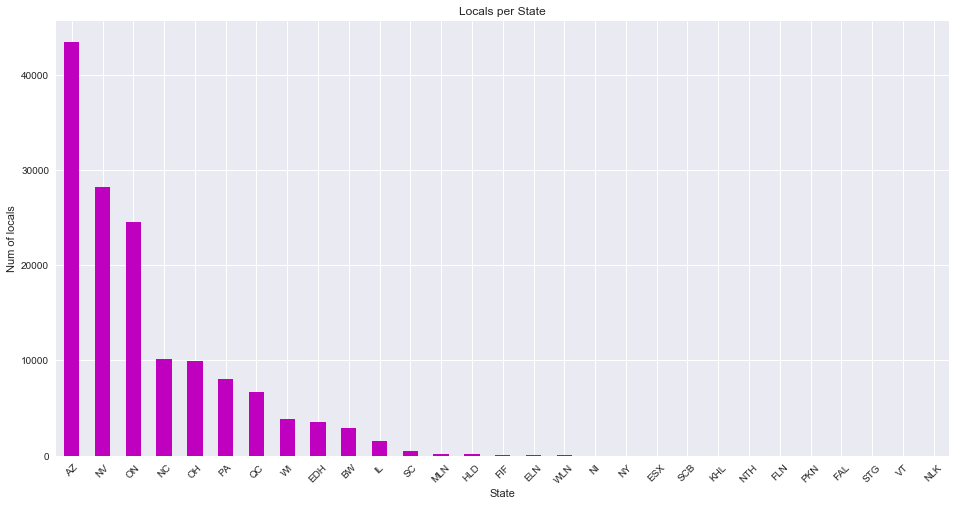

In [94]:
# Locales por cada estado, veamos como es la distribución...
plt.figure(figsize = (16, 8))
((biz.groupby('state')['business_id'].count()).sort_values(ascending=False)).plot(kind='bar', rot=45, color='m')
plt.ylabel('Num of locals')
plt.xlabel('State')
plt.title('Locals per State')
# Aquellos 11 con 4 dígitos en el conteo son a los que se refiere la info sobre el dataset

In [95]:
# Valoración media (estrellas) por estado...
(biz.groupby('state')['stars'].mean()).sort_values(ascending=False)
# Para ver el primero de los 11 en la media de estrellas debemos mirar a la 8ª posición del ranking

state
VT     5.000000
FLN    4.500000
STG    4.500000
ESX    4.181818
SCB    4.000000
FAL    4.000000
NI     3.925000
BW     3.809811
EDH    3.801498
ELN    3.791667
MLN    3.751309
HLD    3.732558
AZ     3.715315
NV     3.698199
QC     3.673215
WI     3.651962
FIF    3.631944
PA     3.625757
NY     3.615385
SC     3.606426
NC     3.570699
OH     3.565824
NLK    3.500000
KHL    3.500000
PKN    3.500000
IL     3.468509
ON     3.444730
WLN    3.411765
NTH    2.000000
Name: stars, dtype: float64

In [8]:
(biz.groupby('state')['stars'].mean()).index

Index([u'AZ', u'BW', u'EDH', u'ELN', u'ESX', u'FAL', u'FIF', u'FLN', u'HLD',
       u'IL', u'KHL', u'MLN', u'NC', u'NI', u'NLK', u'NTH', u'NV', u'NY',
       u'OH', u'ON', u'PA', u'PKN', u'QC', u'SC', u'SCB', u'STG', u'VT', u'WI',
       u'WLN'],
      dtype='object', name=u'state')

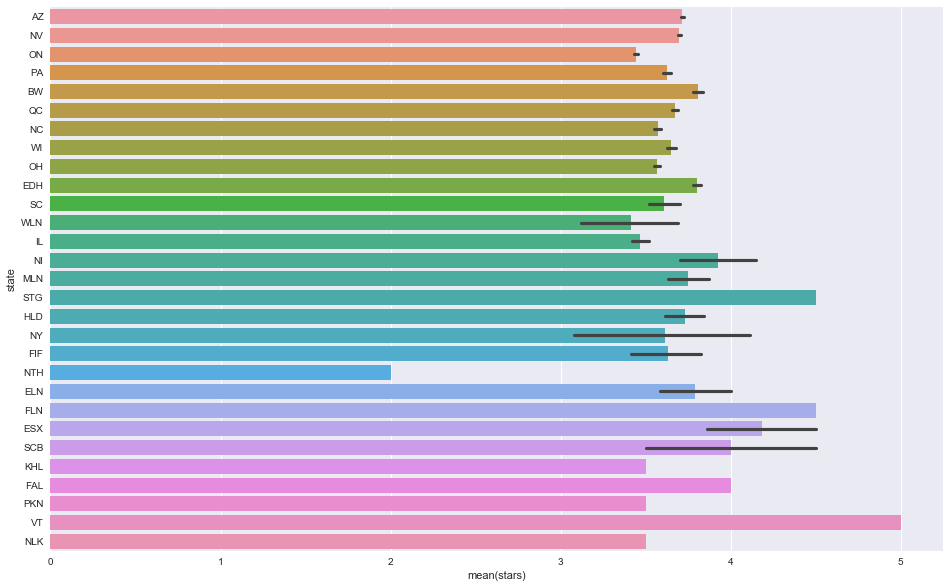

In [96]:
plt.figure(figsize = (16, 10))
sns.barplot(x = 'stars', y = 'state',  data = biz)

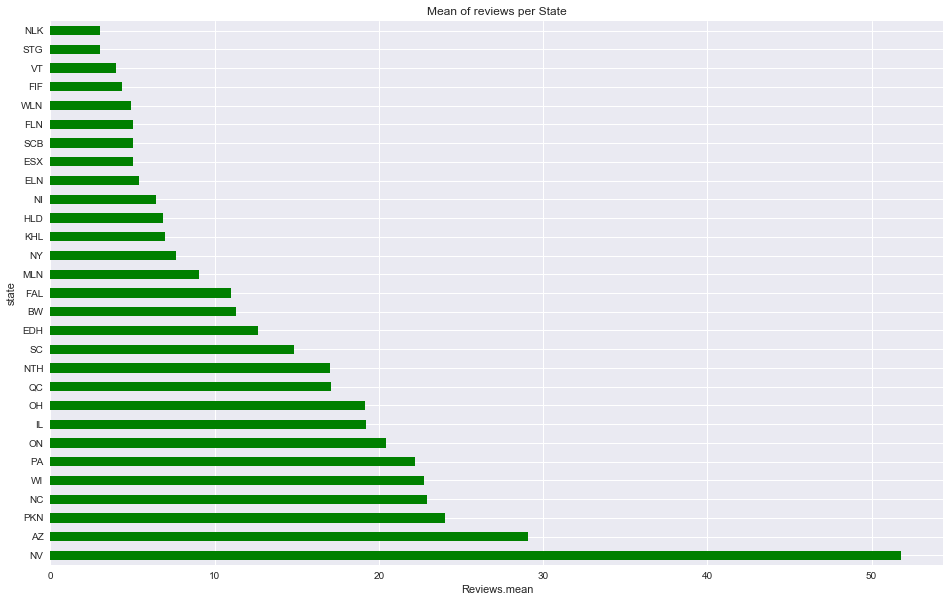

In [98]:
# Número de reviews por local agrupada por estado...así vemos los usuarios de qué estados son más propensos 
# al uso de la plataforma de recomendación de yelp
plt.figure(figsize = (16, 10))
((biz.groupby('state')['review_count'].sum() / biz.groupby('state')['business_id'].count()).sort_values(ascending=False)).plot(kind='barh', color='g')
plt.xlabel('Reviews.mean')
plt.title('Mean of reviews per State')

### Values per attributes

In [99]:
biz.columns[0:39] # Attributes columns in biz dataframe

Index([u'AcceptsInsurance', u'AgesAllowed', u'Alcohol', u'Ambience', u'BYOB',
       u'BYOBCorkage', u'BestNights', u'BikeParking',
       u'BusinessAcceptsBitcoin', u'BusinessAcceptsCreditCards',
       u'BusinessParking', u'ByAppointmentOnly', u'Caters', u'CoatCheck',
       u'Corkage', u'DietaryRestrictions', u'DogsAllowed', u'DriveThru',
       u'GoodForDancing', u'GoodForKids', u'GoodForMeal', u'HairSpecializesIn',
       u'HappyHour', u'HasTV', u'Music', u'NoiseLevel', u'Open24Hours',
       u'OutdoorSeating', u'RestaurantsAttire', u'RestaurantsCounterService',
       u'RestaurantsDelivery', u'RestaurantsGoodForGroups',
       u'RestaurantsPriceRange2', u'RestaurantsReservations',
       u'RestaurantsTableService', u'RestaurantsTakeOut', u'Smoking',
       u'WheelchairAccessible', u'WiFi'],
      dtype='object')

In [107]:
plot_cols = list(biz.columns[0:39])

In [108]:
# He previsualizado y vamos a eliminar de esta nueva lista los atributos con demasiadas categorías para buscar otra manera 
# más útil de estudiarlas.
plot_cols.remove('Ambience')
plot_cols.remove('BestNights')
plot_cols.remove('BusinessParking')
plot_cols.remove('DietaryRestrictions')
plot_cols.remove('GoodForMeal')
plot_cols.remove('HairSpecializesIn')
plot_cols.remove('Music')

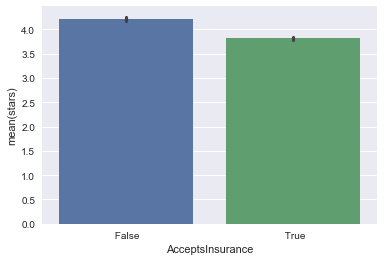

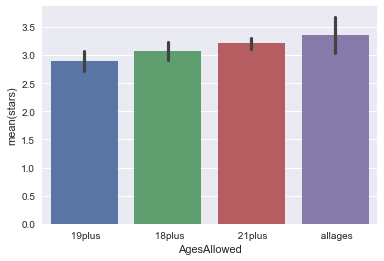

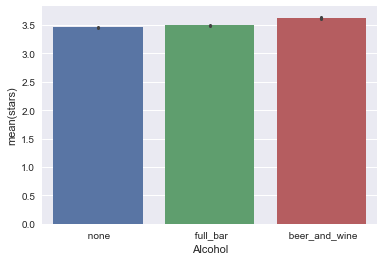

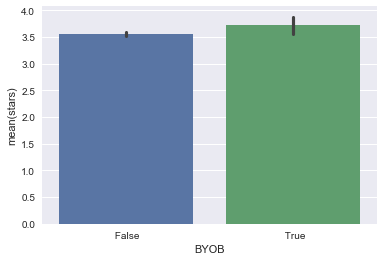

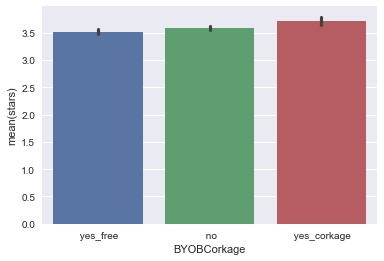

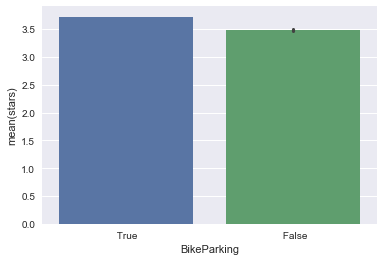

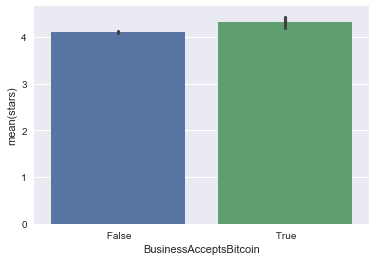

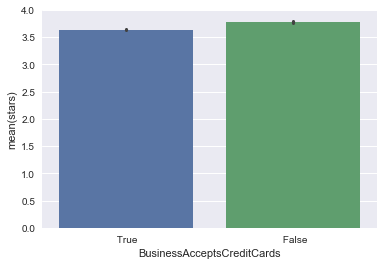

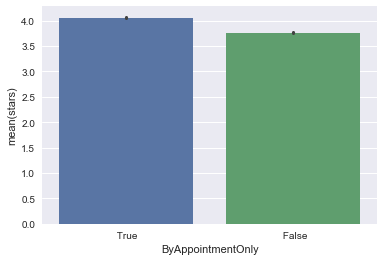

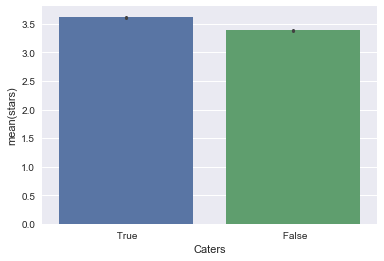

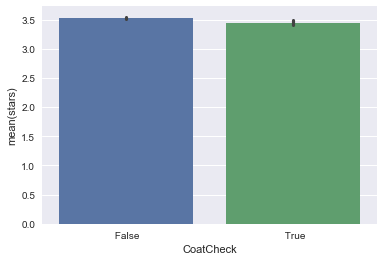

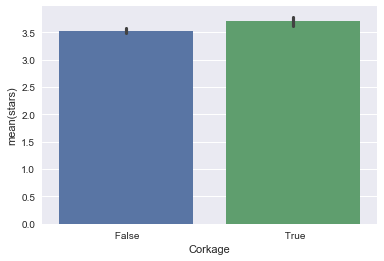

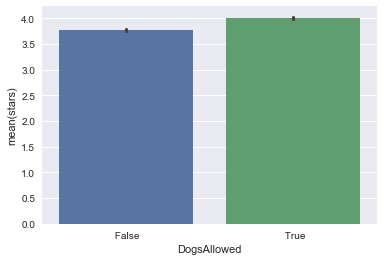

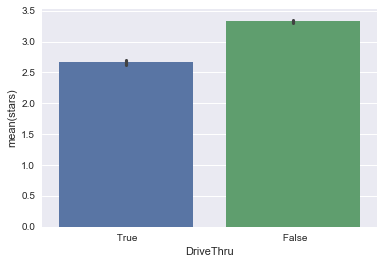

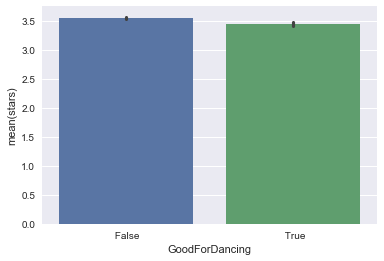

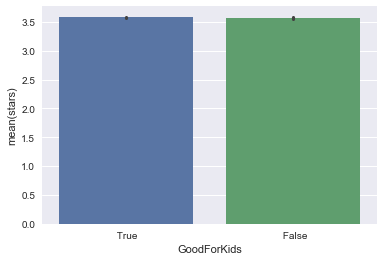

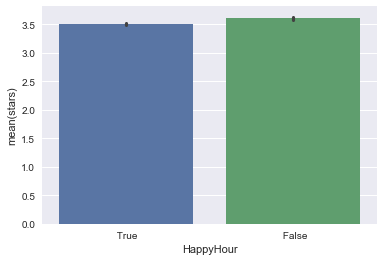

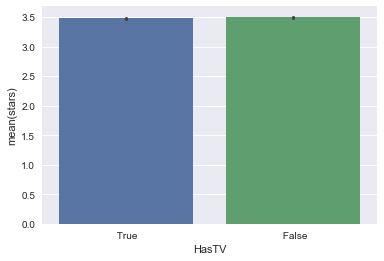

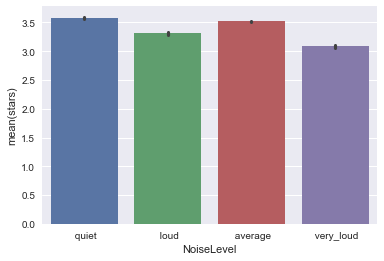

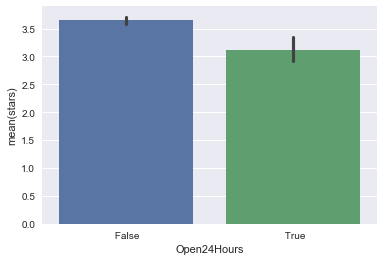

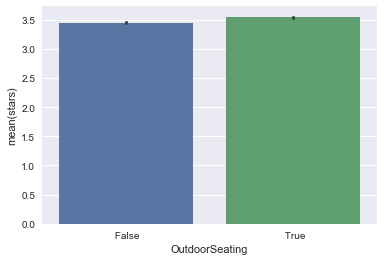

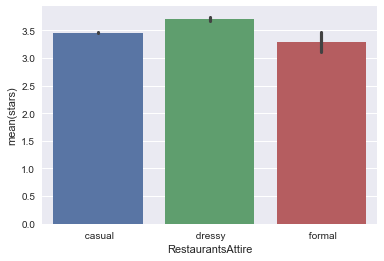

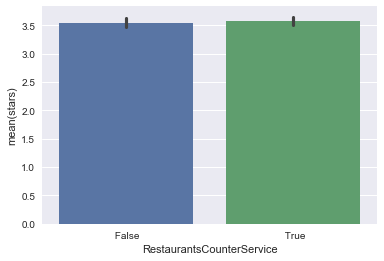

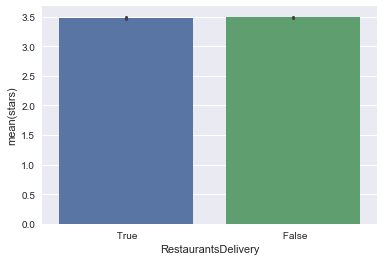

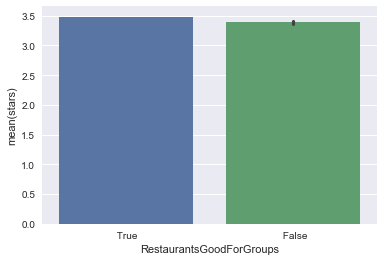

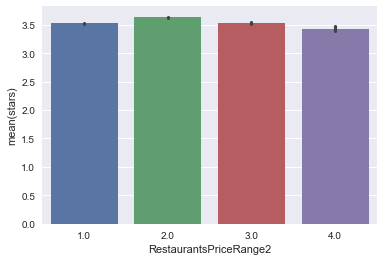

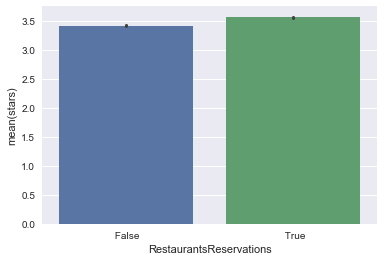

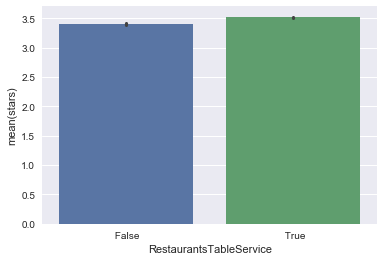

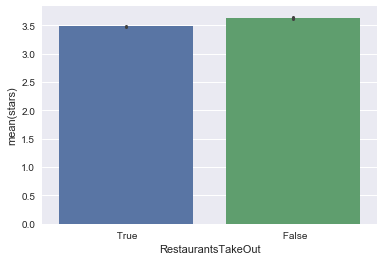

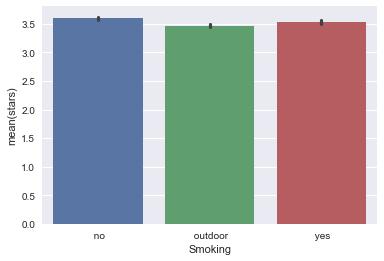

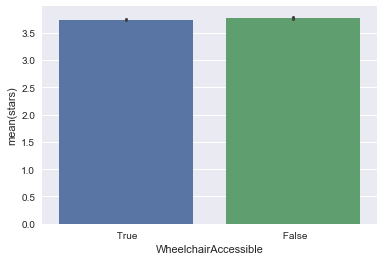

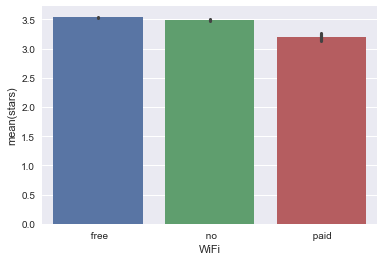

In [109]:
# Mientras tanto vamos a ver para los atributos restantes como se comporta la media de estrellas obtenidas de manera individual
for i in plot_cols:
    plt.figure()
    sns.barplot(x = biz[i], y = 'stars', data = biz)

In [110]:
# Éstos parecen ser los que aportan más diferencia para bien o para mal:
# AcceptsInsurance
# ByAppointmentOnly
# DriveThru
# NoiseLevel
# Open24Hours
# WiFi

Let's deal with the rest of attributes...

In [111]:
# Vemos que este atributo se compone a su vez de varias categorías...y pueden tener el valor True varias de ellas
biz.groupby('Ambience')['stars'].mean()

Ambience
 {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}    3.308678
 {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}     3.554459
 {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': True, 'casual': False}     3.774510
 {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': True, 'casual': True}      3.687500
 {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': True, 'upscale': False, 'casual': False}     3.664697
 {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': T

In [9]:
biz['Ambience'][biz['Ambience'].str.contains('True') == True]

11         {'romantic': False, 'intimate': False, 'class...
25         {'romantic': False, 'intimate': False, 'class...
29         {'romantic': False, 'intimate': False, 'class...
32         {'romantic': False, 'intimate': False, 'class...
33         {'romantic': False, 'intimate': False, 'class...
40         {'romantic': False, 'intimate': False, 'class...
44         {'romantic': False, 'intimate': False, 'class...
48         {'romantic': False, 'intimate': False, 'class...
49         {'romantic': False, 'intimate': False, 'class...
53         {'romantic': False, 'intimate': False, 'class...
60         {'romantic': False, 'intimate': False, 'class...
69         {'romantic': False, 'intimate': False, 'class...
71         {'romantic': False, 'intimate': False, 'class...
83         {'romantic': False, 'intimate': False, 'class...
85         {'romantic': False, 'intimate': False, 'class...
92         {'romantic': False, 'intimate': False, 'class...
99         {'romantic': False, 'intimate

In [8]:
biz['Ambience'][biz['Ambience'].str.contains('True') == True].index

Int64Index([    11,     25,     29,     32,     33,     40,     44,     48,
                49,     53,
            ...
            144038, 144042, 144051, 144053, 144054, 144056, 144061, 144064,
            144065, 144070],
           dtype='int64', length=21965)

In [3]:
ambience = []

for i in biz['Ambience'][biz['Ambience'].str.contains('True') == True].index:
    att = []
    for j in biz['Ambience'][i].replace('{', '').replace('}', '').replace(' ', '').replace("'", '').split(','):
        if j.split(':')[1] == 'True':
            l = (i, str(j.split(':')[0]))
            att.append(tuple(l))
    ambience.append(att)

In [48]:
ambience

[[(11, 'casual')],
 [(25, 'casual')],
 [(29, 'casual')],
 [(32, 'casual')],
 [(33, 'casual')],
 [(40, 'casual')],
 [(44, 'casual')],
 [(48, 'casual')],
 [(49, 'trendy')],
 [(53, 'casual')],
 [(60, 'casual')],
 [(69, 'casual')],
 [(71, 'casual')],
 [(83, 'casual')],
 [(85, 'casual')],
 [(92, 'casual')],
 [(99, 'casual')],
 [(101, 'casual')],
 [(103, 'casual')],
 [(104, 'casual')],
 [(113, 'casual')],
 [(116, 'casual')],
 [(120, 'casual')],
 [(122, 'casual')],
 [(143, 'casual')],
 [(149, 'casual')],
 [(158, 'romantic')],
 [(164, 'casual')],
 [(179, 'casual')],
 [(184, 'casual')],
 [(188, 'casual')],
 [(195, 'romantic')],
 [(204, 'casual')],
 [(209, 'casual')],
 [(225, 'casual')],
 [(231, 'casual')],
 [(235, 'casual')],
 [(240, 'trendy')],
 [(246, 'casual')],
 [(260, 'casual')],
 [(262, 'casual')],
 [(267, 'divey')],
 [(269, 'casual')],
 [(275, 'casual')],
 [(277, 'casual')],
 [(280, 'casual')],
 [(285, 'casual')],
 [(291, 'romantic')],
 [(293, 'casual')],
 [(299, 'casual')],
 [(300, 'tre

In [4]:
len(ambience)

21965

In [4]:
from collections import defaultdict
d = defaultdict(list)

for i in ambience:
    for key, value in i:
        d[key].append(value)

In [14]:
d.items()

[(131074, ['divey']),
 (11, ['casual']),
 (131084, ['casual']),
 (131087, ['casual']),
 (25, ['casual']),
 (29, ['casual']),
 (32, ['casual']),
 (33, ['casual']),
 (40, ['casual']),
 (44, ['casual']),
 (48, ['casual']),
 (49, ['trendy']),
 (53, ['casual']),
 (60, ['casual']),
 (131135, ['casual']),
 (131138, ['casual']),
 (131140, ['casual']),
 (69, ['casual']),
 (71, ['casual']),
 (83, ['casual']),
 (131156, ['touristy', 'casual']),
 (85, ['casual']),
 (131158, ['casual']),
 (131160, ['casual']),
 (131161, ['casual']),
 (92, ['casual']),
 (131167, ['romantic']),
 (99, ['casual']),
 (101, ['casual']),
 (103, ['casual']),
 (104, ['casual']),
 (131183, ['classy']),
 (113, ['casual']),
 (116, ['casual']),
 (131189, ['hipster', 'casual']),
 (120, ['casual']),
 (122, ['casual']),
 (131198, ['casual']),
 (131208, ['casual']),
 (131211, ['casual']),
 (143, ['casual']),
 (149, ['casual']),
 (131226, ['casual']),
 (158, ['romantic']),
 (131235, ['casual']),
 (164, ['casual']),
 (131237, ['casua

In [21]:
d.keys()[:5].index(11)

1

In [11]:
d.values()[:5]

[['divey'], ['casual'], ['casual'], ['casual'], ['casual']]

In [128]:
biz.groupby('BestNights')['stars'].mean()
# Cada día de la semana etiquetado como True/False, varios posibles valores True

BestNights
 {'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': False}    3.491266
 {'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': True}     3.512635
 {'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': True, 'saturday': False}     3.512195
 {'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': True, 'saturday': True}      3.484848
 {'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': True, 'sunday': False, 'saturday': False}     3.586420
 {'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': True, 'sunday': False, 'saturday': True}      3.388889
 {'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': True, 'sunday': True, 'saturday': False}      3.500000
 {

In [129]:
biz.groupby('BusinessParking')['stars'].mean()

BusinessParking
 {'garage': False, 'street': False, 'lot': False, 'valet': False}                        3.768724
 {'garage': False, 'street': False, 'lot': True, 'valet': False}                         3.836066
 {'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}    3.529252
 {'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': True}     3.698630
 {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}     3.662439
 {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': True}      3.643258
 {'garage': False, 'street': False, 'validated': True, 'lot': False, 'valet': False}     3.800000
 {'garage': False, 'street': False, 'validated': True, 'lot': False, 'valet': True}      3.600000
 {'garage': False, 'street': False, 'validated': True, 'lot': True, 'valet': False}      3.910714
 {'garage': False, 'street': False, 'validated': True, 'lot': True, 'valet': True}       4.250000
 {'g

In [130]:
biz.groupby('DietaryRestrictions')['stars'].mean()

DietaryRestrictions
 {'dairy-free': False, 'gluten-free': False, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}    3.845588
 {'dairy-free': False, 'gluten-free': False, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}     3.689655
 {'dairy-free': False, 'gluten-free': False, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': True, 'vegetarian': True}      3.500000
 {'dairy-free': False, 'gluten-free': False, 'vegan': False, 'kosher': False, 'halal': True, 'soy-free': False, 'vegetarian': False}     3.500000
 {'dairy-free': False, 'gluten-free': False, 'vegan': False, 'kosher': False, 'halal': True, 'soy-free': False, 'vegetarian': True}      4.000000
 {'dairy-free': False, 'gluten-free': False, 'vegan': False, 'kosher': True, 'halal': False, 'soy-free': False, 'vegetarian': False}     3.750000
 {'dairy-free': False, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free':

In [131]:
biz.groupby('GoodForMeal')['stars'].mean()

GoodForMeal
 {'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}    3.369476
 {'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': True}     3.504919
 {'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': True, 'brunch': False}     3.287225
 {'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': True, 'brunch': True}      3.632601
 {'dessert': False, 'latenight': False, 'lunch': False, 'dinner': True, 'breakfast': False, 'brunch': False}     3.606561
 {'dessert': False, 'latenight': False, 'lunch': False, 'dinner': True, 'breakfast': False, 'brunch': True}      3.743802
 {'dessert': False, 'latenight': False, 'lunch': False, 'dinner': True, 'breakfast': True, 'brunch': False}      3.131579
 {'dessert': False, 'latenight': False, 'lunch': False, 'dinner': True, 'breakfast': True, 'brunch': True}       3.363636
 {'dessert':

In [134]:
biz.groupby('HairSpecializesIn')['stars'].mean()

HairSpecializesIn
 {'coloring': False, 'africanamerican': False, 'curly': False, 'perms': False, 'kids': False, 'extensions': False, 'asian': False, 'straightperms': False}    4.661290
 {'coloring': False, 'africanamerican': False, 'curly': False, 'perms': False, 'kids': False, 'extensions': False, 'asian': True, 'straightperms': False}     4.000000
 {'coloring': False, 'africanamerican': False, 'curly': False, 'perms': False, 'kids': False, 'extensions': True, 'asian': False, 'straightperms': False}     4.500000
 {'coloring': False, 'africanamerican': False, 'curly': False, 'perms': False, 'kids': False, 'extensions': True, 'asian': False, 'straightperms': True}      4.500000
 {'coloring': False, 'africanamerican': False, 'curly': False, 'perms': False, 'kids': True, 'extensions': False, 'asian': False, 'straightperms': False}     3.950000
 {'coloring': False, 'africanamerican': False, 'curly': False, 'perms': False, 'kids': True, 'extensions': True, 'asian': False, 'straightperms': F

In [135]:
biz.groupby('Music')['stars'].mean()

Music
 {'dj': False, 'background_music': False, 'no_music': False, 'karaoke': False, 'live': False, 'video': False, 'jukebox': False}    3.547926
 {'dj': False, 'background_music': False, 'no_music': False, 'karaoke': False, 'live': False, 'video': False, 'jukebox': True}     3.580084
 {'dj': False, 'background_music': False, 'no_music': False, 'karaoke': False, 'live': False, 'video': True, 'jukebox': False}     3.347826
 {'dj': False, 'background_music': False, 'no_music': False, 'karaoke': False, 'live': False, 'video': True, 'jukebox': True}      3.392857
 {'dj': False, 'background_music': False, 'no_music': False, 'karaoke': False, 'live': True, 'video': False, 'jukebox': False}     3.603295
 {'dj': False, 'background_music': False, 'no_music': False, 'karaoke': False, 'live': True, 'video': False, 'jukebox': True}      3.567568
 {'dj': False, 'background_music': False, 'no_music': False, 'karaoke': False, 'live': True, 'video': True, 'jukebox': False}      3.500000
 {'dj': False,

### Values per categories

In [3]:
biz['categories'][0:5] # Cada valor es 'unicode' 

0     [Tobacco Shops, Nightlife, Vape Shops, Shopping]
1    [Caterers, Grocery, Food, Event Planning & Ser...
2         [Restaurants, Pizza, Chicken Wings, Italian]
3    [Hair Removal, Beauty & Spas, Blow Dry/Out Ser...
4    [Hotels & Travel, Event Planning & Services, H...
Name: categories, dtype: object

In [42]:
(biz['categories'].value_counts()).head(50)
# Vemos que las combinaciones de 2 categorías son las que más resultados aglutinan...vamos a tratar de hacerlo extensible
# al resto del df

[Coffee & Tea, Food]                                    949
[Pizza, Restaurants]                                    948
[Restaurants, Pizza]                                    916
[Mexican, Restaurants]                                  899
[Food, Coffee & Tea]                                    868
[Nail Salons, Beauty & Spas]                            865
[Restaurants, Mexican]                                  863
[Chinese, Restaurants]                                  858
[Beauty & Spas, Nail Salons]                            834
[Restaurants, Chinese]                                  783
[Beauty & Spas, Hair Salons]                            689
[Hair Salons, Beauty & Spas]                            670
[Restaurants, Italian]                                  567
[Italian, Restaurants]                                  562
[Grocery, Food]                                         536
[Food, Grocery]                                         514
[Automotive, Auto Repair]               

In [42]:
biz['categories'][3].replace('[','').replace(']','').split(', ')[0:2] 
# Nótese como en el split incluimos la coma y el espacio en blanco que existe después de ésta

[u'Hair Removal', u'Beauty & Spas']

In [4]:
# Creamos una lista que incluya las dos primeras palabras del campo categorías para ver si podemos reducir los posibles grupos
cat = []

for i in biz['categories']:
    cat.append(i.replace('[','').replace(']','').split(', ')[0:2])

In [5]:
len(cat)

144072

In [6]:
biz['cat'] = ''

In [7]:
biz['cat'] = cat

In [8]:
biz['cat'].value_counts()
# Algunos valores parecen aparecer indistintamente en primera o segunda posición en la lista de dobles categorías.

[Pizza, Restaurants]                                  1351
[Restaurants, Pizza]                                  1274
[Coffee & Tea, Food]                                  1180
[Mexican, Restaurants]                                1120
[Food, Coffee & Tea]                                  1112
[Chinese, Restaurants]                                1104
[Restaurants, Mexican]                                1085
[Nail Salons, Beauty & Spas]                          1047
[Beauty & Spas, Hair Salons]                          1040
[Beauty & Spas, Nail Salons]                          1025
[Hair Salons, Beauty & Spas]                           997
[Restaurants, Chinese]                                 995
[Restaurants, Fast Food]                               904
[Restaurants, Italian]                                 870
[Italian, Restaurants]                                 857
[Fast Food, Restaurants]                               838
[Automotive, Auto Repair]                              7

In [9]:
# Prueba
cat_test = cat

# Creamos 2 listas, cat_1 para la primera categoría y cat_2, en caso de existir ésta, para la segunda.
cat_1 = []
cat_2 = []

for i in cat_test:
    cat_1.append(i[0])
    
for i in cat_test:
    if len(i)==1:
        cat_2.append('None')
    else:
        cat_2.append(i[1])

In [10]:
# Obtenemos el número de ocurrencias en ambas listas...
from collections import Counter
Counter(cat_1).most_common()

[(u'Restaurants', 16632),
 (u'Food', 6538),
 (u'Shopping', 6257),
 (u'Beauty & Spas', 4746),
 (u'Home Services', 3533),
 (u'Health & Medical', 3083),
 (u'Automotive', 3045),
 (u'Local Services', 2551),
 (u'Nightlife', 2353),
 (u'Active Life', 1917),
 (u'Bars', 1886),
 (u'Pizza', 1836),
 (u'Event Planning & Services', 1786),
 (u'Coffee & Tea', 1639),
 (u'Fast Food', 1526),
 (u'Hair Salons', 1443),
 (u'Mexican', 1433),
 (u'Hotels & Travel', 1415),
 (u'Chinese', 1382),
 (u'Fashion', 1375),
 (u'Arts & Entertainment', 1357),
 (u'American (Traditional)', 1349),
 (u'Nail Salons', 1315),
 (u'Italian', 1293),
 (u'Sandwiches', 1265),
 (u'Auto Repair', 1260),
 (u'Burgers', 1108),
 (u'Pets', 976),
 (u'Doctors', 946),
 (u'Real Estate', 920),
 (u'American (New)', 911),
 (u'Grocery', 888),
 (u'Breakfast & Brunch', 834),
 (u'Bakeries', 821),
 (u'Home & Garden', 803),
 (u'Fitness & Instruction', 779),
 (u'Professional Services', 763),
 (u'Ice Cream & Frozen Yogurt', 715),
 (u'Hotels', 697),
 (u'Special

In [11]:
Counter(cat_2).most_common()

[(u'Restaurants', 16150),
 (u'Food', 5974),
 (u'Shopping', 5872),
 (u'Beauty & Spas', 4536),
 (u'Home Services', 3373),
 (u'Health & Medical', 3047),
 (u'Automotive', 2890),
 (u'Nightlife', 2308),
 (u'Local Services', 2232),
 (u'Bars', 1978),
 (u'Active Life', 1833),
 (u'Pizza', 1765),
 (u'Event Planning & Services', 1671),
 (u'Fast Food', 1644),
 (u'Coffee & Tea', 1584),
 (u'Hair Salons', 1558),
 (u'Hotels & Travel', 1543),
 ('None', 1512),
 (u'Mexican', 1346),
 (u'Fashion', 1339),
 (u'Sandwiches', 1328),
 (u'American (Traditional)', 1324),
 (u'Chinese', 1294),
 (u'Auto Repair', 1272),
 (u'Italian', 1272),
 (u'Nail Salons', 1250),
 (u'Arts & Entertainment', 1203),
 (u'Burgers', 1052),
 (u'Pets', 1005),
 (u'American (New)', 957),
 (u'Doctors', 917),
 (u'Home & Garden', 899),
 (u'Real Estate', 889),
 (u'Grocery', 858),
 (u'Breakfast & Brunch', 845),
 (u'Bakeries', 818),
 (u'Fitness & Instruction', 788),
 (u'Specialty Food', 767),
 (u'Professional Services', 733),
 (u'Hotels', 691),
 (u'

In [12]:
# Las primeras 11 posiciones las ocupan las mismas categorías casi además en el mismo orden.
# Vamos a crear una lista con todas ellas y ver de nuevo las ocurrencias para establecer las categorías principales
# y subcategorías
cat_mix = cat_1 + cat_2
Counter(cat_mix).most_common()

[(u'Restaurants', 32782),
 (u'Food', 12512),
 (u'Shopping', 12129),
 (u'Beauty & Spas', 9282),
 (u'Home Services', 6906),
 (u'Health & Medical', 6130),
 (u'Automotive', 5935),
 (u'Local Services', 4783),
 (u'Nightlife', 4661),
 (u'Bars', 3864),
 (u'Active Life', 3750),
 (u'Pizza', 3601),
 (u'Event Planning & Services', 3457),
 (u'Coffee & Tea', 3223),
 (u'Fast Food', 3170),
 (u'Hair Salons', 3001),
 (u'Hotels & Travel', 2958),
 (u'Mexican', 2779),
 (u'Fashion', 2714),
 (u'Chinese', 2676),
 (u'American (Traditional)', 2673),
 (u'Sandwiches', 2593),
 (u'Nail Salons', 2565),
 (u'Italian', 2565),
 (u'Arts & Entertainment', 2560),
 (u'Auto Repair', 2532),
 (u'Burgers', 2160),
 (u'Pets', 1981),
 (u'American (New)', 1868),
 (u'Doctors', 1863),
 (u'None', 1837),
 (u'Real Estate', 1809),
 (u'Grocery', 1746),
 (u'Home & Garden', 1702),
 (u'Breakfast & Brunch', 1679),
 (u'Bakeries', 1639),
 (u'Fitness & Instruction', 1567),
 (u'Professional Services', 1496),
 (u'Specialty Food', 1449),
 (u'Ice Cr

In [18]:
# Unificamos en una nueva lista invirtiendo el orden (2ª cat como primera) para aquellas en que la categoría en segunda
# posición se encuentra en la lista facilitada. Ésta incluye las 11 categorías que más aparecen más 'Hotels & Travel' 
# ya que tienen también un buen número de registros y no se pueden incluir en las anteriores

cat2 = []

for i in cat:
    if len(i) == 1:
        cat2.append(i)
    else:
        if i[0] in ['Restaurants','Food','Shopping','Beauty & Spas','Home Services','Health & Medical','Automotive',
                    'Local Services','Nightlife','Bars','Active Life','Hotels & Travel']:
            res = [i[0], i[1]]
            cat2.append(res)
        elif i[1] in ['Restaurants','Food','Shopping','Beauty & Spas','Home Services','Health & Medical','Automotive',
                    'Local Services','Nightlife','Bars','Active Life','Hotels & Travel']:
            res2 = [i[1], i[0]]
            cat2.append(res2)
        else:
            res3 = [i[0], i[1]]
            cat2.append(res3)

In [19]:
len(cat2)

144072

In [20]:
biz['cat2'] = ''

In [21]:
biz['cat2'] = cat2

In [22]:
biz['cat2'].value_counts()

[Restaurants, Pizza]                                  2625
[Food, Coffee & Tea]                                  2292
[Restaurants, Mexican]                                2205
[Restaurants, Chinese]                                2099
[Beauty & Spas, Nail Salons]                          2072
[Beauty & Spas, Hair Salons]                          2037
[Restaurants, Fast Food]                              1742
[Restaurants, Italian]                                1727
[Automotive, Auto Repair]                             1562
[Restaurants, American (Traditional)]                 1367
[Food, Grocery]                                       1326
[Restaurants, Sandwiches]                             1295
[Restaurants, Burgers]                                1112
[Shopping, Fashion]                                   1102
[Food, Bakeries]                                      1043
[Food, Ice Cream & Frozen Yogurt]                     1027
[Restaurants, American (New)]                          9

In [23]:
(biz['cat2'].value_counts()).head(50).sum()
# Casi un 33% de los establecimientos estarían recogidos en estas primeras 50 combinaciones de categorías.

47409L

In [24]:
# Creamos una nueva lista sólo con la categoría principal, aquélla que va en la primera posición [0] en la lista, para dar 
# lugar a una nueva columna en el df
main_cat = []

for i in cat2:
    main_cat.append(i[0])

In [25]:
biz['main_cat'] = main_cat

In [26]:
biz['main_cat'].value_counts()

Restaurants                   31817
Food                          11872
Shopping                      11685
Beauty & Spas                  9059
Home Services                  6706
Health & Medical               5974
Automotive                     5830
Local Services                 4561
Active Life                    3662
Nightlife                      3608
Hotels & Travel                2889
Bars                           2853
Event Planning & Services      1318
Arts & Entertainment           1145
Pets                            965
Fashion                         804
Fast Food                       652
Professional Services           637
Financial Services              615
Sandwiches                      587
Real Estate                     489
American (Traditional)          488
Pet Services                    478
Doctors                         476
Auto Repair                     469
Burgers                         463
Fitness & Instruction           460
Home & Garden               

In [27]:
# Repetimos el proceso para la subcategoría (segunda posición, [1]) teniendo en cuenta que no existe para todos los registros
subcat = []

for i in cat2:
    if len(i)==1:
        subcat.append('None')
    else:
        subcat.append(i[1])

In [28]:
biz['subcat'] = ''

In [29]:
biz['subcat'] = subcat

In [30]:
biz['subcat'].value_counts()

Pizza                        3170
Coffee & Tea                 2897
Hair Salons                  2576
Mexican                      2522
Fast Food                    2518
Chinese                      2426
Nail Salons                  2302
Italian                      2190
American (Traditional)       2185
Event Planning & Services    2139
Auto Repair                  2063
Sandwiches                   2006
Fashion                      1910
Burgers                      1697
Grocery                      1561
American (New)               1545
None                         1512
Arts & Entertainment         1415
Bakeries                     1398
Doctors                      1387
Breakfast & Brunch           1325
Real Estate                  1320
Home & Garden                1252
Ice Cream & Frozen Yogurt    1235
Fitness & Instruction        1107
Japanese                     1094
Specialty Food               1059
Nightlife                    1053
Hotels                       1050
Cafes         

Stars mean by main category

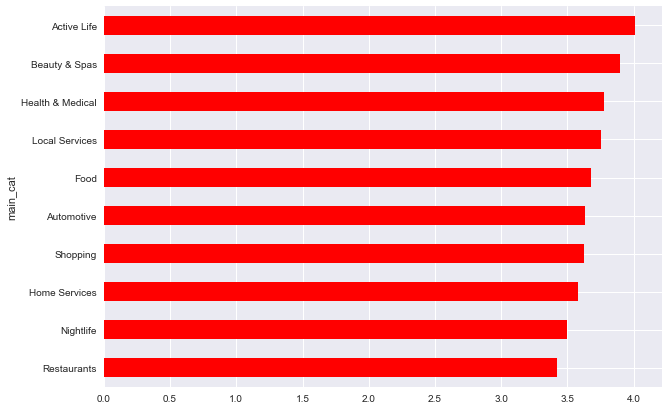

In [31]:
plt.figure(figsize = (10, 7))
((biz.groupby('main_cat')['stars'].mean()[biz.groupby('main_cat').size() > 3500]).sort_values(ascending=True)).plot(kind='barh', color='r')

Review mean by main category

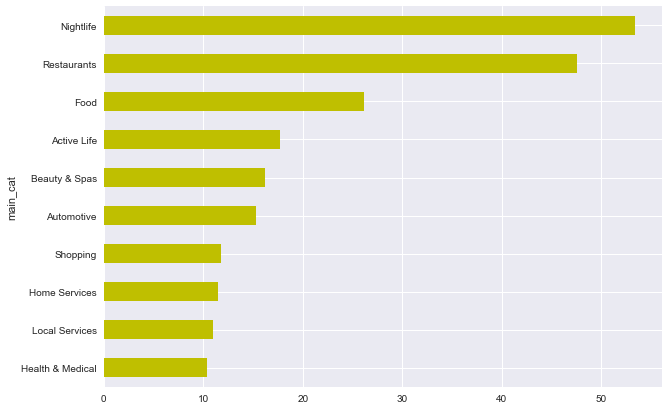

In [34]:
plt.figure(figsize = (10, 7))
((biz.groupby('main_cat')['review_count'].mean()[biz.groupby('main_cat').size() > 3500]).sort_values(ascending=True)).plot(kind='barh', color='y')

Stars mean by double category

In [35]:
# Convertimos a string la columna 'cat2' porque siendo lista no nos permite hacer .groupby() sobre la misma
biz['cat2'] = biz.cat2.apply(str)

In [38]:
type(biz['cat2'][0])

str

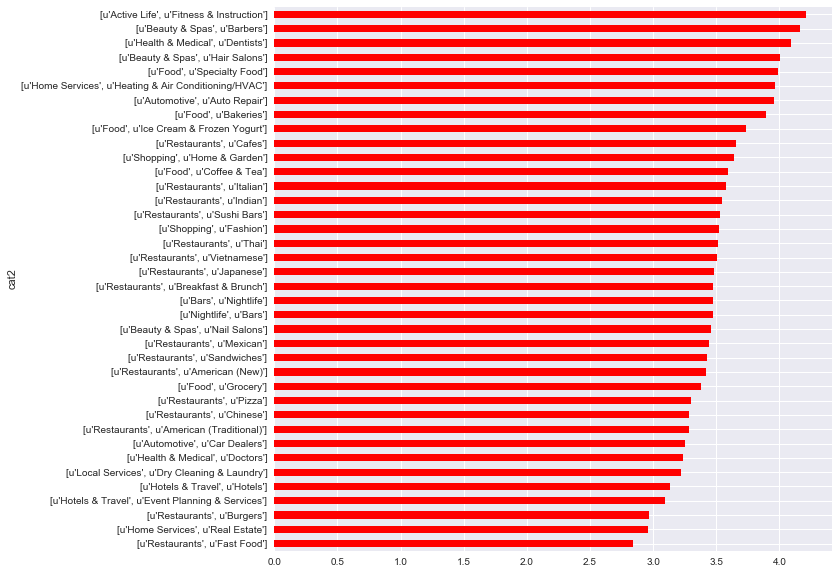

In [43]:
plt.figure(figsize = (10, 10))
((biz.groupby('cat2')['stars'].mean()[biz.groupby('cat2').size() > 500]).sort_values(ascending=True)).plot(kind='barh', color='r')

Review mean by double category

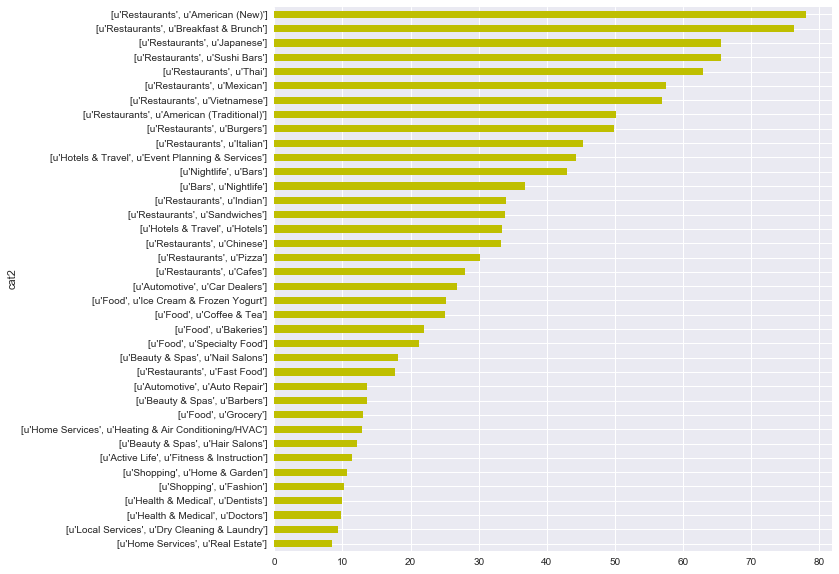

In [41]:
plt.figure(figsize = (10, 10))
((biz.groupby('cat2')['review_count'].mean()[biz.groupby('cat2').size() > 500]).sort_values(ascending=True)).plot(kind='barh', color='y')